# 연습문제(2)-풀이

## #01. 작업준비

1. 패키지 설치

In [1]:
from pandas import read_excel
from matplotlib import pyplot as plt
import seaborn as sb
import datetime as dt
import numpy as np

2. 데이터 가져오기

In [2]:
df = read_excel('https://data.hossam.kr/D01/covid19.xlsx')
df

,서울시 기준일,서울 확진자,서울시 일일 확진,서울시 사망,전국 확진,전국 일일 확진,전국 사망
0,2023-05-31,6204277,5987.0,6492,31703511.0,24411.0,34784
1,2023-05-30,6198290,3326.0,6486,31679100.0,13529.0,34767
2,2023-05-29,6194964,1393.0,6485,31665571.0,6868.0,34760
3,2023-05-28,6194964,1393.0,6485,31665571.0,6868.0,34760
4,2023-05-27,6191196,4078.0,6485,31647238.0,17796.0,34784
...,...,...,...,...,...,...,...
1207,2020-02-09,10,0.0,0,27.0,0.0,0
1208,2020-02-08,10,0.0,0,24.0,0.0,0
1209,2020-02-07,10,0.0,0,24.0,0.0,0
1210,2020-02-06,11,0.0,0,24.0,0.0,0


In [4]:
# 데이터 타입 확인(서울시 기준일을 index로 설정 시 dtypes 출력 불가)
df.dtypes

서울시 기준일      datetime64[ns]
서울 확진자                int64
서울시 일일 확진           float64
서울시 사망                int64
전국 확진               float64
전국 일일 확진            float64
전국 사망                 int64
dtype: object

## #02. 데이터 전처리

1. 검색 날짜 변수 생성

데이터 시각화 연습문제 (2)_파이썬_설명.ipynb 참고

In [5]:
input_date = input("검색일을 입력(yyyymmdd) : ")
print(type(input_date))
input_date

<class 'str'>


'20230505'

입력받은 날짜를 `datetime` 객체로 생성

In [6]:
start_date = dt.datetime.strptime(input_date, '%Y%m%d')
print(type(start_date))
start_date

<class 'datetime.datetime'>


datetime.datetime(2023, 5, 5, 0, 0)

2. 검색 종료일 구하기

In [7]:
delta = dt.timedelta(days=6)
end_date = start_date + delta
print(type(end_date))
end_date

<class 'datetime.datetime'>


datetime.datetime(2023, 5, 11, 0, 0)

3. 검색 기간에 따른 데이터 추출

In [11]:
# # 이 상태로 `정렬` 없이 출력하면 그래프는 역순으로 생성됨 
# target_df = df.query('`서울시 기준일` >= @ start_date and `서울시 기준일` <= @end_date')
# # target_df = query_df.sort_values('서울시 기준일')
# target_df

In [12]:
query_df = df.query('`서울시 기준일` >= @ start_date and `서울시 기준일` <= @end_date')
# 정렬을 사용해 날짜를 오름차순으로 추출
target_df = query_df.sort_values('서울시 기준일')
target_df

,서울시 기준일,서울 확진자,서울시 일일 확진,서울시 사망,전국 확진,전국 일일 확진,전국 사망
26,2023-05-05,6097034,4650.0,6433,31251203.0,18752.0,34518
25,2023-05-06,6099419,2385.0,6434,31263004.0,11801.0,34521
24,2023-05-07,6103182,3763.0,6436,31277746.0,14742.0,34527
23,2023-05-08,6104824,1642.0,6438,31285910.0,8164.0,34534
22,2023-05-09,6110569,5745.0,6443,31307591.0,21681.0,34548
21,2023-05-10,6116190,5621.0,6448,31331112.0,23521.0,34571
20,2023-05-11,6121046,4856.0,6451,31351686.0,20574.0,34583


## #03. 데이터 시각화

1. 그래프 설정

In [14]:
plt.rcParams['font.family'] = 'Malgun Gothic'   #글꼴
plt.rcParams["font.size"] = 10  #폰트 크기
plt.rcParams["figure.figsize"] = (12, 8)    #그래프 크기
plt.rcParams['axes.unicode_minus'] = False  #음수

2. x축 레이블 생성

02-Matplotlib_유형별-그래프.ipynb의 x축 좌표 참고

x축 좌표

In [15]:
x = list(range(0, len(target_df['서울시 기준일'])))
x

[0, 1, 2, 3, 4, 5, 6]

x축 텍스트 설정(날짜) 방법 1

In [16]:
xticks = []

# 월.일 형식으로 x축 텍스트 생성
for i in range(0, len(target_df['서울시 기준일'])):
    xticks.append(target_df['서울시 기준일'].iloc[i].strftime('%m.%d'))

xticks

['05.05', '05.06', '05.07', '05.08', '05.09', '05.10', '05.11']

x축 텍스트 설정(날짜) 방법 2

In [39]:
# xticks = []

# for i in target_df['서울시 기준일']:
#     xticks.append(i.strftime('%m.%d'))

# xticks

### 그래프 생성

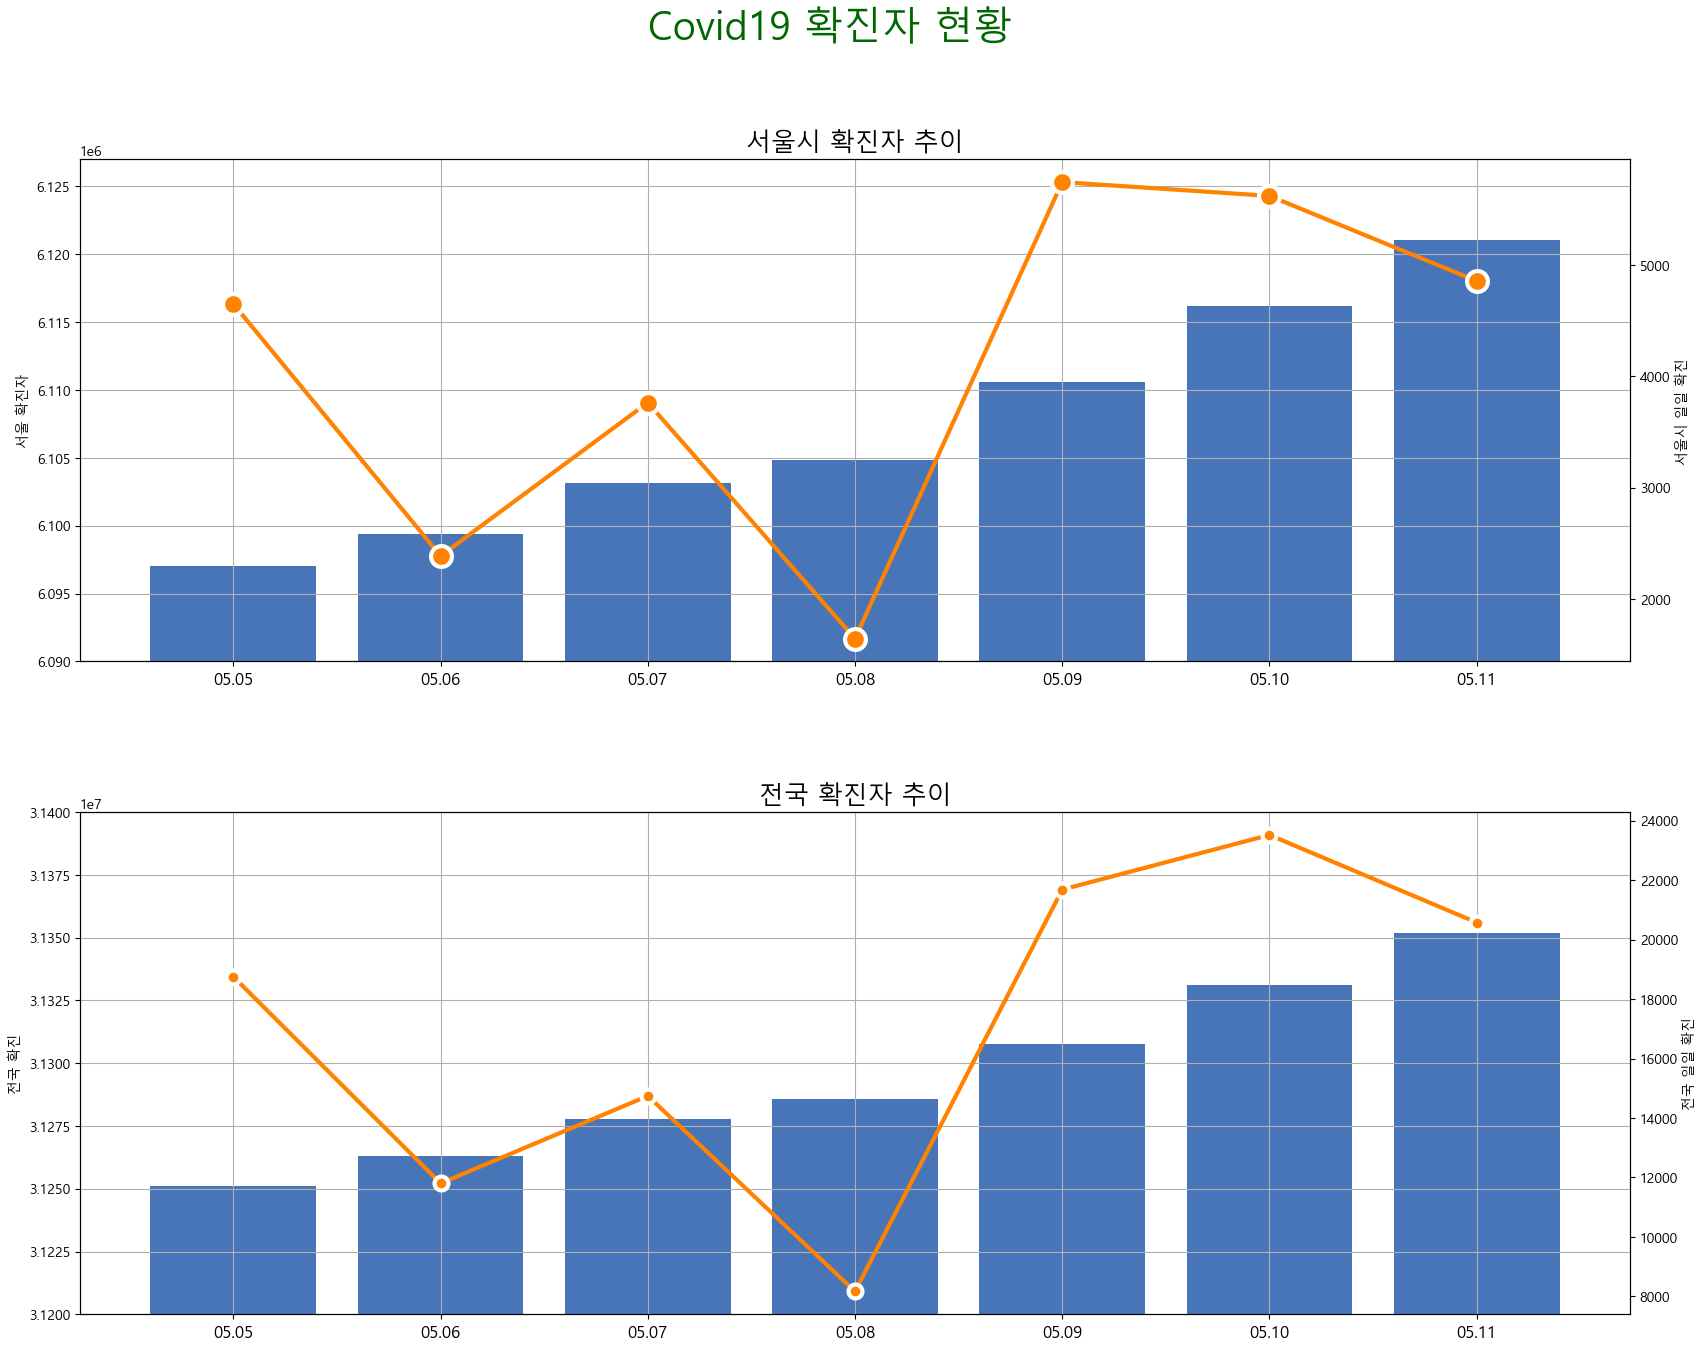

In [49]:
# 2행1열 서브플롯
fig, (ax1_left, ax2_left) = plt.subplots(2, 1, figsize=(20, 15))

# 각 서브플롯별로 twinx 생성
ax1_right = ax1_left.twinx()
ax2_right = ax2_left.twinx() 

# 전체 제목
fig.suptitle('Covid19 확진자 현황', fontsize=28, color='#006600')

# 각 그래프 간의 세로(hspace) 간격 지정
fig.subplots_adjust(hspace=0.3)

# 첫 번째 왼쪽 그래프
sb.barplot(data=target_df, x=x, y='서울 확진자', color="#3471CB", ax=ax1_left)
ax1_left.grid()
ax1_left.set_title('서울시 확진자 추이', fontsize=18)
# ax1_left.set_ylim(5900000, 6050000)
ax1_left.set_ylim(6090000, 6127000) # 범위를 조절해 데이터가 두드러지게 유도(데이터 조작 아님)
ax1_left.set_xticks(x)
ax1_left.set_xticklabels(xticks, fontsize=12, rotation=0)

# 첫 번째 오른쪽 그래프
sb.lineplot(data=target_df, x=x, y='서울시 일일 확진', ax=ax1_right,
            color="#FF8200", linestyle='-', linewidth=3,
            marker="o", markersize=15, markerfacecolor="#FF8200",
            markeredgecolor="#ffffff", markeredgewidth=3)

# 두 번째 왼쪽 그래프
sb.barplot(data=target_df, x=x, y='전국 확진', color="#3471CB", ax=ax2_left)
ax2_left.grid()
ax2_left.set_title('전국 확진자 추이', fontsize=18)
ax2_left.set_ylim(31200000, 31400000)
ax2_left.set_xticks(x)
ax2_left.set_xticklabels(xticks, fontsize=12, rotation=0)

# 두 번째 오른쪽 그래프
sb.lineplot(data=target_df, x=x, y='전국 일일 확진', ax=ax2_right,
            color="#FF8200", linestyle='-', linewidth=3,
            marker="o", markersize=10, markerfacecolor="#FF8200",
            markeredgecolor="#ffffff", markeredgewidth=3)

plt.show()
plt.close()